# Medical Analysis - Anemia
data set from:Department of Health and Family Welfare, Govt. of India has published in India.
Link: https://nrhm-mis.nic.in/hmisreports/AHSReports.aspx

In [1]:
import numpy as np 
import pandas as pd

#have a look at the overall descriptions, but doesn't have too much information
#later I figure out from the data source website that different files in data in different states in Inida.
data_dictionary_loc = 'CAB_data_dictionary.xlsx'
data_dic = pd.read_excel(data_dictionary_loc, dtype = object)
data_dic['File Content Description']

0    This file contains information of Clinical, An...
1    This file contains information of Clinical, An...
2    This file contains information of Clinical, An...
3    This file contains information of Clinical, An...
4    This file contains information of Clinical, An...
5    This file contains information of Clinical, An...
6    This file contains information of Clinical, An...
7    This file contains information of Clinical, An...
8    This file contains information of Clinical, An...
Name: File Content Description, dtype: object

We select a random state which is called UTTAR PRADESH.

In [2]:
data_u_pradesh = pd.read_csv('CAB_09_UP.csv',low_memory=False) 
data_u_pradesh.head()

,state_code,district_code,rural_urban,stratum,psu_id,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54
0,9,1,1,1,2331468,1,2,20/01/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
1,9,1,1,1,2331484,1,2,20/01/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
2,9,1,1,1,2331570,1,2,20/01/2014,30,3,...,6,7,6,7,7,8,0,-1,-1,NaN
3,9,1,1,1,2331439,7,1,22/01/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN
4,9,1,1,1,2331452,7,1,22/01/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN


## Data Cleansing
Select adults as our analysis set

In [3]:
data = data_u_pradesh[(data_u_pradesh['age_code']=='Y')&(data_u_pradesh['age']>=18)]
len(data)

299570

In [4]:
#Replace None value from -1 to Nan
data = data.replace([-1, '-1'], np.nan)

In [5]:
#Drop attribute that's helpful for childen under 5
cols_under5 = ['illness_type', 'illness_duration', 'treatment_type']
cols_under3 = ['first_breast_feeding', 'is_cur_breast_feeding', 'day_or_month_for_breast_feeding_', 'day_or_month_for_breast_feeding', 'water_month', 'ani_milk_month', 'semisolid_month_or_day', 'solid_month', 'vegetables_month_or_day']
data = data.drop(cols_under5, axis = 1)
data = data.drop(cols_under3, axis = 1)

In [6]:
#drop unrelated attributes(state_code,record-id,House Number, etc)
unnecessary_attr = ['length_height_code','age_code','date_survey','state_code', 'rural_urban','psu_id', 'ahs_house_unit', 'house_hold_no', 'record_code_iodine_reason', 'sl_no', 'usual_residance', 'usual_residance_reason', 'identification_code', 'v54']
data = data.drop(unnecessary_attr, axis = 1)
data.head()

,district_code,stratum,test_salt_iodine,record_code_iodine,sex,age,date_of_birth,month_of_birth,year_of_birth,weight_measured,...,bp_diastolic,bp_diastolic_2reading,pulse_rate,pulse_rate_2_reading,diabetes_test,fasting_blood_glucose,fasting_blood_glucose_mg_dl,marital_status,gauna_perfor_not_perfor,duration_pregnanacy
0,1,1,30,3,1,39,15,6,1974,2.0,...,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN
1,1,1,30,3,2,32,15,6,1981,1.0,...,95.0,96.0,79.0,81.0,1.0,1.0,105.0,3.0,1.0,3.0
3,1,1,30,3,1,64,30,6,1949,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,30,3,1,44,15,6,1969,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1,30,3,2,42,15,6,1971,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we are focusing on anemia this time, there are three attribute talks about it directly: 'haemoglobin_test', 'haemoglobin','haemoglobin_level'

From data dictionary explaination:
- 'haemoglobin_test' - Consent for Haemoglobin test (Yes-1; No-2)
- 'haemoglobin'- Status of Haemoglobin Test (Measured-1; Member not present-2; Refused-3, Other-4)
- 'haemoglobin_level' - Outcome of Haemoglobin Level (Hb) Test (in percentage gms) 

We will use the to judge if someone is having anemia:

In [7]:
#drop other two
data = data.drop(['haemoglobin_test', 'haemoglobin'], axis = 1)

Have a look at the distribution:

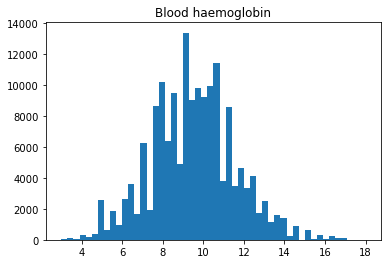

In [8]:
from matplotlib import pyplot as plt
plt.hist(data.haemoglobin_level[~np.isnan(data.haemoglobin_level)], bins=50)
plt.title('Blood haemoglobin')
plt.show()

In [9]:
data_anemia = data[data['haemoglobin_level'].notnull()]
data_anemia.shape

(164969, 26)

We can see above there are about half of the data still have value haemoglobin_level data to use for analysis.

In [10]:
data_anemia.describe(include='all')

,district_code,stratum,test_salt_iodine,record_code_iodine,sex,age,date_of_birth,month_of_birth,year_of_birth,weight_measured,...,bp_diastolic,bp_diastolic_2reading,pulse_rate,pulse_rate_2_reading,diabetes_test,fasting_blood_glucose,fasting_blood_glucose_mg_dl,marital_status,gauna_perfor_not_perfor,duration_pregnanacy
count,164969.000000,164969.000000,164969.000000,164969.000000,164969.000000,164969.000000,164969.000000,164969.000000,164969.000000,164968.000000,...,162321.000000,162315.000000,162321.000000,162315.000000,164250.000000,164120.000000,156852.000000,64829.000000,44663.000000,11104.000000
mean,34.163867,1.308409,21.338421,2.664870,1.548952,40.174366,12.621893,5.368857,1973.328565,1.020434,...,77.579672,76.557441,81.014102,81.073733,1.038320,1.062089,99.368704,2.465301,2.657121,8.280980
std,20.576596,0.759534,11.102421,0.621447,0.497599,16.664789,5.764396,2.430117,16.768419,0.176929,...,14.365398,13.967427,12.989822,12.368375,0.191967,0.325059,20.471640,0.946779,0.637153,5.922427
min,1.000000,0.000000,0.000000,1.000000,1.000000,18.000000,0.000000,0.000000,1900.000000,1.000000,...,40.000000,40.000000,40.000000,40.000000,1.000000,1.000000,50.000000,1.000000,1.000000,0.000000
25%,16.000000,1.000000,7.000000,2.000000,1.000000,26.000000,15.000000,6.000000,1961.000000,1.000000,...,68.000000,67.000000,71.000000,72.000000,1.000000,1.000000,91.000000,1.000000,2.000000,4.000000
50%,32.000000,1.000000,30.000000,3.000000,2.000000,37.000000,15.000000,6.000000,1976.000000,1.000000,...,77.000000,76.000000,80.000000,80.000000,1.000000,1.000000,97.000000,3.000000,3.000000,7.000000
75%,52.000000,2.000000,30.000000,3.000000,2.000000,52.000000,15.000000,6.000000,1988.000000,1.000000,...,86.000000,85.000000,89.000000,89.000000,1.000000,1.000000,104.000000,3.000000,3.000000,11.000000
max,70.000000,2.000000,30.000000,3.000000,2.000000,99.000000,31.000000,12.000000,2014.000000,4.000000,...,160.000000,160.000000,140.000000,140.000000,2.000000,4.000000,400.000000,8.000000,3.000000,109.000000


### Adding a column indicating anemia
For testing the model, we need to add a column for anemia. For men, anemia is diagnosed when the haemoglobin level is less than 13 g/dL, and for women less than 12 g/dL.

In [11]:
data_anemia['anemia'] = np.where(((data_anemia['sex'] == 1) & (data_anemia['haemoglobin_level'] < 13.0)) | ((data_anemia['sex'] == 2) & (data_anemia['haemoglobin_level'] < 12.0)), 1, 0)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
data_anemia.groupby("anemia")['anemia'].count()

anemia
0     12196
1    152773
Name: anemia, dtype: int64

In [13]:
#Drop the haemoglobin_level column since we don't need to use it anymore
data_anemia = data_anemia.drop('haemoglobin_level', axis = 1)

In [14]:
#Have a look at our cleaned dataset
data_anemia.head(10)

,district_code,stratum,test_salt_iodine,record_code_iodine,sex,age,date_of_birth,month_of_birth,year_of_birth,weight_measured,...,bp_diastolic_2reading,pulse_rate,pulse_rate_2_reading,diabetes_test,fasting_blood_glucose,fasting_blood_glucose_mg_dl,marital_status,gauna_perfor_not_perfor,duration_pregnanacy,anemia
1,1,1,30,3,2,32,15,6,1981,1.0,...,96.0,79.0,81.0,1.0,1.0,105.0,3.0,1.0,3.0,1
6,1,1,30,3,1,42,15,8,1971,1.0,...,80.0,89.0,77.0,1.0,1.0,100.0,NaN,NaN,NaN,1
11,1,1,30,3,2,30,15,6,1983,2.0,...,NaN,NaN,NaN,1.0,1.0,94.0,3.0,1.0,3.0,1
19,1,1,30,3,1,42,15,6,1971,2.0,...,NaN,NaN,NaN,1.0,1.0,90.0,NaN,NaN,NaN,1
20,1,1,30,3,1,77,15,6,1936,2.0,...,NaN,NaN,NaN,1.0,1.0,84.0,NaN,NaN,NaN,1
22,1,1,30,3,2,37,15,6,1976,1.0,...,85.0,80.0,73.0,1.0,1.0,97.0,3.0,1.0,3.0,1
29,1,1,30,3,2,61,15,6,1952,1.0,...,75.0,72.0,70.0,1.0,1.0,94.0,NaN,NaN,NaN,1
30,1,1,30,3,1,49,15,6,1964,1.0,...,81.0,64.0,65.0,1.0,1.0,88.0,NaN,NaN,NaN,1
31,1,1,30,3,2,44,15,6,1969,1.0,...,89.0,86.0,84.0,1.0,1.0,102.0,3.0,1.0,3.0,1
32,1,1,30,3,1,24,15,2,1989,1.0,...,85.0,63.0,62.0,1.0,1.0,98.0,NaN,NaN,NaN,1


**We can see that number of people who is anemic is much higher than thos who is not.**

Dataset needs balancing. We'll keep all the negative cases and 12196 random positive cases.

In [45]:
negative_cases = data_anemia[data_anemia['anemia'] == 0]
positive_sample = data_anemia[data_anemia['anemia'] == 1].sample(n=12196)
data_anemia_balanced = pd.concat([negative_cases, positive_sample])
data_anemia_balanced.sort_index
data_anemia_balanced.groupby('anemia')['anemia'].count()

anemia
0.0    12196
1.0    12196
Name: anemia, dtype: int64

**Now to get data ready for training a model. There's many missing values so we'll have to fill them in. I'll use imputation.**

In [46]:
from sklearn.preprocessing import Imputer

imputer = Imputer()
data_anemia_imputed = pd.DataFrame(imputer.fit_transform(data_anemia_balanced))
data_anemia_imputed.columns = data_anemia_balanced.columns
data_anemia_imputed.index = data_anemia_balanced.index
data_anemia = data_anemia_imputed

## Training Model

used cross validation

In [55]:
from sklearn import cross_validation

#Extract only the values
array = data_anemia.values

#Y is the target column, X has the rest
X = array[:,0:25]
Y = array[:,25]

#Validation chuck size 
val_size = 0.1

#Split the data into chunks
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=None)

**1. Let's try KNN first and print out the accuracy**

In [50]:
'''from sklearn.neighbors import KNeighborsClassifier

n_list = [1,2,3]
acc = []
algo = "KNN"

for n_neighbors in n_list:
    
    knn = KNeighborsClassifier(n_jobs=-1,n_neighbors=n_neighbors)
   
    algo = "KNN"

    knn.fit(X_train,Y_train)
    result = model.score(X_val, Y_val)
    predict_set = model.predict(X_val)

    acc.append("%s with n=%s Accuracy of %s" % (algo,n_neighbors,result))
    
print(acc)'''

['KNN with n=1 Accuracy of 0.490163934426', 'KNN with n=2 Accuracy of 0.490163934426', 'KNN with n=3 Accuracy of 0.490163934426']


We can see that Knn model proforms very poor in this dataset, the protential reason is some variables I've selected is not very relative to anemia.

** 2. RandomForest **

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)

model.fit(X_train,Y_train)
result = model.score(X_val, Y_val)
predict_set = model.predict(X_val)

print("Accuracy of randomforest is: %s"%  result)

Accuracy of randomforest is: 0.615573770492


In [57]:
confusion_matrix_result = confusion_matrix(Y_val, predict_set)
print("Confusion matr ix:\n%s" % confusion_matrix_result)

Confusion matrix:
[[872 333]
 [605 630]]


In [58]:
from sklearn.metrics import  classification_report, accuracy_score

print(classification_report(Y_val, predict_set))
print("Accuracy: %.2f" % accuracy_score(Y_val, predict_set))

             precision    recall  f1-score   support

        0.0       0.59      0.72      0.65      1205
        1.0       0.65      0.51      0.57      1235

avg / total       0.62      0.62      0.61      2440

Accuracy: 0.62
